In [7]:
import ROOT
import uuid

In [8]:
from rootpy.plotting import set_style
set_style('ATLAS', shape='rect')

INFO:rootpy.plotting.style] using ROOT style 'ATLAS(shape=rect)'


In [9]:
rfile = ROOT.TFile('/Volumes/data01/skims_run2/v17/skim_tight/mc15/group.phys-higgs.hh.mc15_13TeV.361108.PoPy8_Ztt.D3.e3601_s2726_r7725_r7676_p2949.v17.2_hist/group.phys-higgs.hh.mc15_13TeV.361108.PoPy8_Ztt.D3.e3601_s2726_r7725_r7676_p2949.v17.2_hist.root')
tree = rfile.Get('NOMINAL')

In [10]:
tree.GetEntries()
tree.Show(1)

======> EVENT:1
 HLT_tau35_medium1_tracktwo_tau25_medium1_tracktwo = 1
 HLT_tau35_medium1_tracktwo_tau25_medium1_tracktwo_03dR30_L1DR_TAU20ITAU12I = 0
 HLT_tau35_medium1_tracktwo_tau25_medium1_tracktwo_03dR30_L1DR_TAU20ITAU12I_J25 = 0
 HLT_tau35_medium1_tracktwo_tau25_medium1_tracktwo_L1DR_TAU20ITAU12I = 1
 HLT_tau35_medium1_tracktwo_tau25_medium1_tracktwo_L1DR_TAU20ITAU12I_J25 = 1
 HLT_tau35_medium1_tracktwo_tau25_medium1_tracktwo_L1TAU20IM_2TAU12IM = 1
 NOMINAL_pileup_combined_weight = 0.865996
 NOMINAL_pileup_random_run_number = 304178
 PRW_DATASF_1down_pileup_combined_weight = 1.1169
 PRW_DATASF_1down_pileup_random_run_number = 304178
 PRW_DATASF_1up_pileup_combined_weight = 0.768687
 PRW_DATASF_1up_pileup_random_run_number = 303421
 dijet           = 1
 dijet_cosalpha  = 0.125621
 dijet_deta      = 3.06885
 dijet_dphi      = 1.44134
 dijet_dpt       = 2.64266
 dijet_dr        = 3.39047
 dijet_ptx       = 13.1154
 dijet_pty       = -84.7094
 dijet_qxq       = 0
 dijet_scal_sum_pt =

INFO:ROOT.TCanvas.Print] png file /var/folders/bc/l64drt4s3_l10vst72v7c3600000gn/T/tmpFOgJ0y.png has been created


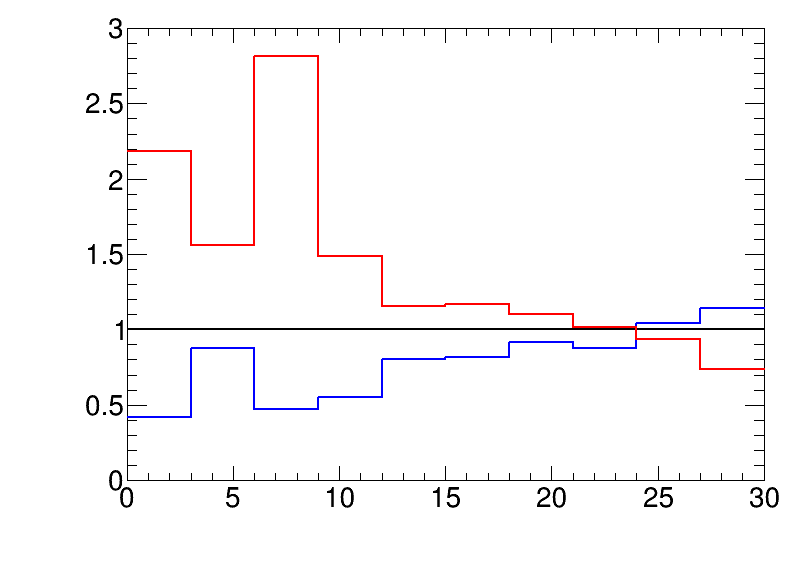

In [30]:
variable = 'n_avg_int_cor'
h_template = ROOT.TH1F(uuid.uuid4().hex, "", 10, 0, 30)

c = ROOT.TCanvas()
cut_qxq = ROOT.TCut("ditau_qxq == -1")
cut_tauid = ROOT.TCut('ditau_tau0_jet_bdt_tight == 1 && ditau_tau1_jet_bdt_tight == 1')
cut_presel = ROOT.TCut('selection_cb_preselection == 1')
cut = cut_qxq + cut_tauid + cut_presel

hnom = h_template.Clone(uuid.uuid4().hex + '_nominal')
weight_nom = ROOT.TCut('weight_mc') * ROOT.TCut('NOMINAL_pileup_combined_weight')
weighted_cut  = cut * weight_nom
tree.Draw('{0}>>{1}'.format(variable, hnom.GetName()) , weighted_cut, "")

hup = h_template.Clone(uuid.uuid4().hex + '_up')
weight_up = ROOT.TCut('weight_mc') * ROOT.TCut('PRW_DATASF_1up_pileup_combined_weight')
weighted_cut  = cut * weight_up
tree.Draw('{0}>>{1}'.format(variable, hup.GetName()) , weighted_cut, "")

hdown = h_template.Clone(uuid.uuid4().hex + '_down')
weight_down = ROOT.TCut('weight_mc') * ROOT.TCut('PRW_DATASF_1down_pileup_combined_weight')
weighted_cut  = cut * weight_down
tree.Draw('{0}>>{1}'.format(variable, hdown.GetName()) , weighted_cut, "")

hnom.SetLineColor(ROOT.kBlack)

hup_r   = hup.Clone(hup.GetName() + '_ratio')
hdown_r = hup.Clone(hdown.GetName() + '_ratio')
hnom_r  = hup.Clone(hnom.GetName() + '_ratio')

hup_r.Divide(hup, hnom)
hdown_r.Divide(hdown, hnom)
hnom_r.Divide(hnom, hnom)

hup_r.SetLineColor(ROOT.kBlue)
hdown_r.SetLineColor(ROOT.kRed)
hnom_r.GetYaxis().SetRangeUser(0, 3)
hnom_r.Draw('HIST')
hup_r.Draw('sameHIST')
hdown_r.Draw('sameHIST')
c

INFO:ROOT.TCanvas.Print] png file /var/folders/bc/l64drt4s3_l10vst72v7c3600000gn/T/tmpD3zIpZ.png has been created


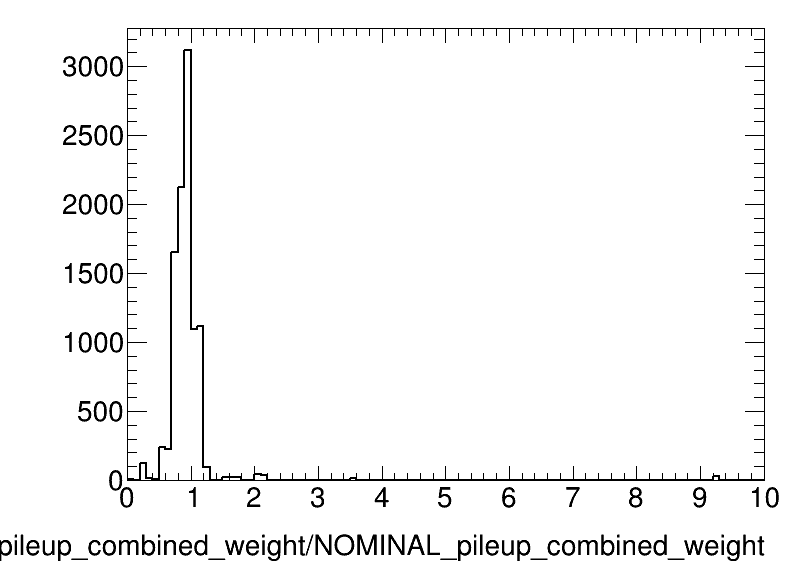

In [24]:
c = ROOT.TCanvas()
tree.Draw('PRW_DATASF_1up_pileup_combined_weight/NOMINAL_pileup_combined_weight', '', 'HIST')
c